# Lab Assignment 1 
### Learning and generalisation in feed-forward networks — from perceptron learning to backprop

### 3. Part I
####  3.1 Classification with a single-layer perceptron
##### 3.1.1 Generation of linearly-separable data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Draw two sets of points/patterns in 2D from multivariate normal distribution
def generatePattern(shuffle=1, verbose=1, pattern=1):
    #Activate random shuffeling of samples? Set 1 or 0
    shuffle = 1

    n = 100
    mu_A = np.array([2.0, 1.0])
    mu_B = np.array([-2.0, 0.0])
    sigma_A = 0.5
    sigma_B = 0.5

    class_A = np.concatenate((np.multiply(np.random.normal(0,1,(1,n)),sigma_A) +  mu_A[0],np.multiply(np.random.normal(0,1,(1,n)),sigma_A) +  mu_A[1]))
    class_B = np.concatenate((np.multiply(np.random.normal(0,1,(1,n)),sigma_B) +  mu_B[0],np.multiply(np.random.normal(0,1,(1,n)),sigma_B) +  mu_A[1]))

    if shuffle:
        class_A = np.random.permutation(class_A)
        class_B = np.random.permutation(class_B)
        
        mask = np.random.randint(2,size=(2*n,),dtype=bool)
        mask_ = np.invert(mask)
        patterns = np.zeros((2,2*n))
        patterns = np.concatenate((patterns,np.ones((1,2*n))))
        targets = np.zeros((2*n,))
        classes = np.concatenate((class_A,class_B),axis=1)

        patterns[0,mask] = classes[0,mask]
        patterns[0,mask_] = classes[0,mask_]
    
        patterns[1,mask] = classes[1,mask]
        patterns[1,mask_] = classes[1,mask_]
    
        targets[mask] = 1; #Class A = 1
        targets[mask_] = -1 #Class B = -1
    else:
        patterns = np.concatenate((class_A,class_B),axis=1)
        targets = np.array([np.ones(n,),-np.ones(n,)])
        targets = np.ravel(targets)
    
    if verbose:
        #Plotting classes if desired
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt.legend(handles=[plt_A, plt_B])
        plt.show()
    
    
    
    if pattern:
        return patterns, targets
    else:
        return class_A, class_B
    

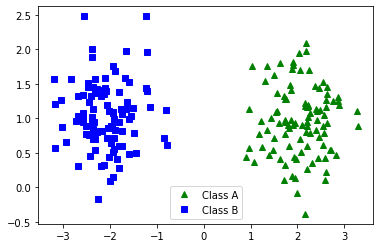

In [4]:
class_A, class_B = generatePattern(shuffle=0,pattern=0)

#### 3.1.2 Classification with a single-layer perceptron and analysis

In [5]:
#Randomly initalize weight matrix W
def weights_init(n_dim,n_points,scale):
    W = scale*np.random.randn(n_dim,n_points)
    return W

def get_decisionBound(w):
    #print(w.shape)
    slope_vec = np.array([w[0][1],-w[0][0]])
    slope = slope_vec[1]/slope_vec[0]
    intercept = w[0][2]/np.linalg.norm(w)
    
    linespace = np.linspace(-2,2,10)
    line = slope*linespace + intercept
    
    return line

def plt_decisionBound(W_perceptron,W_delta_rule,class_A,class_B):
    linespace = np.linspace(-2,2,10)
    line_perceptron = get_decisionBound(W_perceptron)
    line_delta_rule = get_decisionBound(W_delta_rule)
    
    
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    plt_A, = ax1.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
    plt_B, = ax1.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
    plt_line_perceptron, = ax1.plot(linespace,line_perceptron,'k',label='DecisionBoundary')
    ax1.legend(handles=[plt_A, plt_B, plt_line_perceptron])
    ax1.axis([-2.5,2.5,-2,2])
    plt.title('Perceptron Learning Rule')
        
    ax2 = fig.add_subplot(122)
    plt_A, = ax2.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
    plt_B, = ax2.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
    plt_line_delta_rule, = ax2.plot(linespace,line_delta_rule,'k',label='DecisionBoundary')
    ax2.legend(handles=[plt_A, plt_B, plt_line_delta_rule])
    ax2.axis([-2.5,2.5,-2,2])
    plt.title('Delta Learning Rule')
    
    plt.show()

In [7]:
def error(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean((T-Y)**2)

def update_weights_delta_rule(eta,T,W,X):
    H = np.matmul(W,X)
    err = error(T,H)
    dW = -eta*np.matmul(H-T,np.transpose(X))
    return dW, err

def update_weights_delta_rule_sequential(eta,X,T,W):
    weights = 0
    for i in range(len(T)):
        X_sample = X[:,i]
        T_sample = T[i]

        H = np.matmul(W,X_sample)
        dW = -eta*(H-T_sample)*np.transpose(X_sample)
        err = error(T,H)
        
        weights = weights+dW
        
    return weights, err

def update_weights_perceptron(eta,T,W,X):
    H = np.matmul(W,X)
    Y = np.sign(H)
    err = error(T,Y)
    dW = -eta*np.matmul((Y-T),np.transpose(X))
    #dW = eta*err*X
    return dW, err


def train_network(eta,X,W,T,epochs,plot=1,sequential=False):
    
    errors = np.zeros((2,epochs))
    W_perceptron = W
    W_delta_rule = W
    
    if plot:
        plt_decisionBound(W_perceptron,W_delta_rule,class_A,class_B)
        
    
    for i in range(epochs):
        
        if sequential:
            dw_delta_rule, err_delta_rule = update_weights_delta_rule_sequential(eta,X,T,W_delta_rule)
        else:
            dw_delta_rule, err_delta_rule = update_weights_delta_rule(eta,T,W_delta_rule,X)
        
        dW_perceptron, err_perceptron = update_weights_perceptron(eta,T,W_perceptron,X)
        
        W_delta_rule = dw_delta_rule + W_delta_rule
        W_perceptron = dW_perceptron + W_perceptron
        
        errors[0,i] = err_perceptron
        errors[1,i] = err_delta_rule
        
        if plot:
            plt_decisionBound(W_perceptron,W_delta_rule,class_A,class_B)
            
    return W_perceptron, W_delta_rule, errors


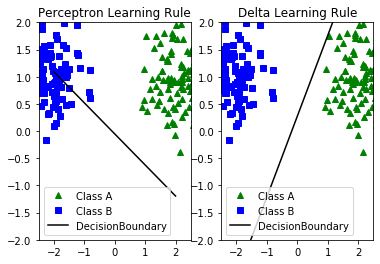

In [12]:
#Perceptron and Delta learning rule
eta = 1e-3
epochs = 20
n_outputs = 1
n_dim = 3
scale = 1e-2

X, T = generatePattern(verbose=0,pattern=1)
W = weights_init(n_outputs,n_dim,scale)

#W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)
W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs,0)
#W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)
plt_decisionBound(W_perceptron,W_delta_rule,class_A,class_B)



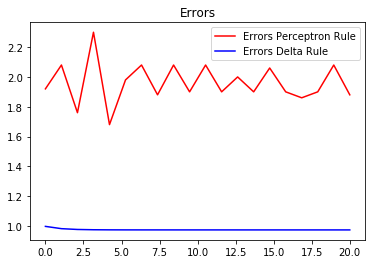

[[1.92       2.08       1.76       2.3        1.68       1.98
  2.08       1.88       2.08       1.9        2.08       1.9
  2.         1.9        2.06       1.9        1.86       1.9
  2.08       1.88      ]
 [0.99698319 0.98164174 0.97626788 0.97438015 0.97371236 0.97347169
  0.97338076 0.97334251 0.97332298 0.97331025 0.97330017 0.97329126
  0.97328299 0.97327517 0.97326772 0.97326061 0.97325381 0.97324731
  0.97324109 0.97323514]]


In [10]:
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
plt.legend(handles=[plt_errs_perceptron, plt_errs_delta_rule])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()

print(errors)